<a href="https://colab.research.google.com/github/phuongnt3391/DecisionTree/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [7]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Split the dataset into training and test set

In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

Training the Decision Tree model on the training set

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Predict a new parameter

In [29]:
classifier.predict([[30,87000]])

array([0])

Use the Decision Tree classification model to predict the Test set results

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]]


Check the performance of the Decision tree classification model

In [32]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        65
           1       0.79      0.97      0.87        35

    accuracy                           0.90       100
   macro avg       0.89      0.92      0.89       100
weighted avg       0.92      0.90      0.90       100



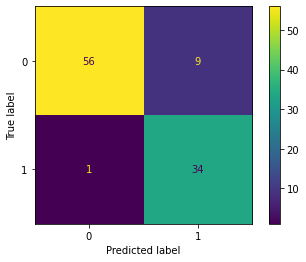

In [33]:
plot_confusion_matrix(classifier, X_test,y_test)

In [34]:
classifier.feature_importances_

array([0.55, 0.45])

[Text(930.0, 1006.6666666666666, 'Age <= 42.5\nentropy = 0.943\nsamples = 300\nvalue = [192, 108]'),
 Text(465.0, 604.0, 'Salary <= 89500.0\nentropy = 0.652\nsamples = 215\nvalue = [179, 36]'),
 Text(232.5, 201.33333333333326, 'entropy = 0.236\nsamples = 181\nvalue = [174, 7]'),
 Text(697.5, 201.33333333333326, 'entropy = 0.602\nsamples = 34\nvalue = [5, 29]'),
 Text(1395.0, 604.0, 'Age <= 52.5\nentropy = 0.617\nsamples = 85\nvalue = [13, 72]'),
 Text(1162.5, 201.33333333333326, 'entropy = 0.742\nsamples = 57\nvalue = [12, 45]'),
 Text(1627.5, 201.33333333333326, 'entropy = 0.222\nsamples = 28\nvalue = [1, 27]')]

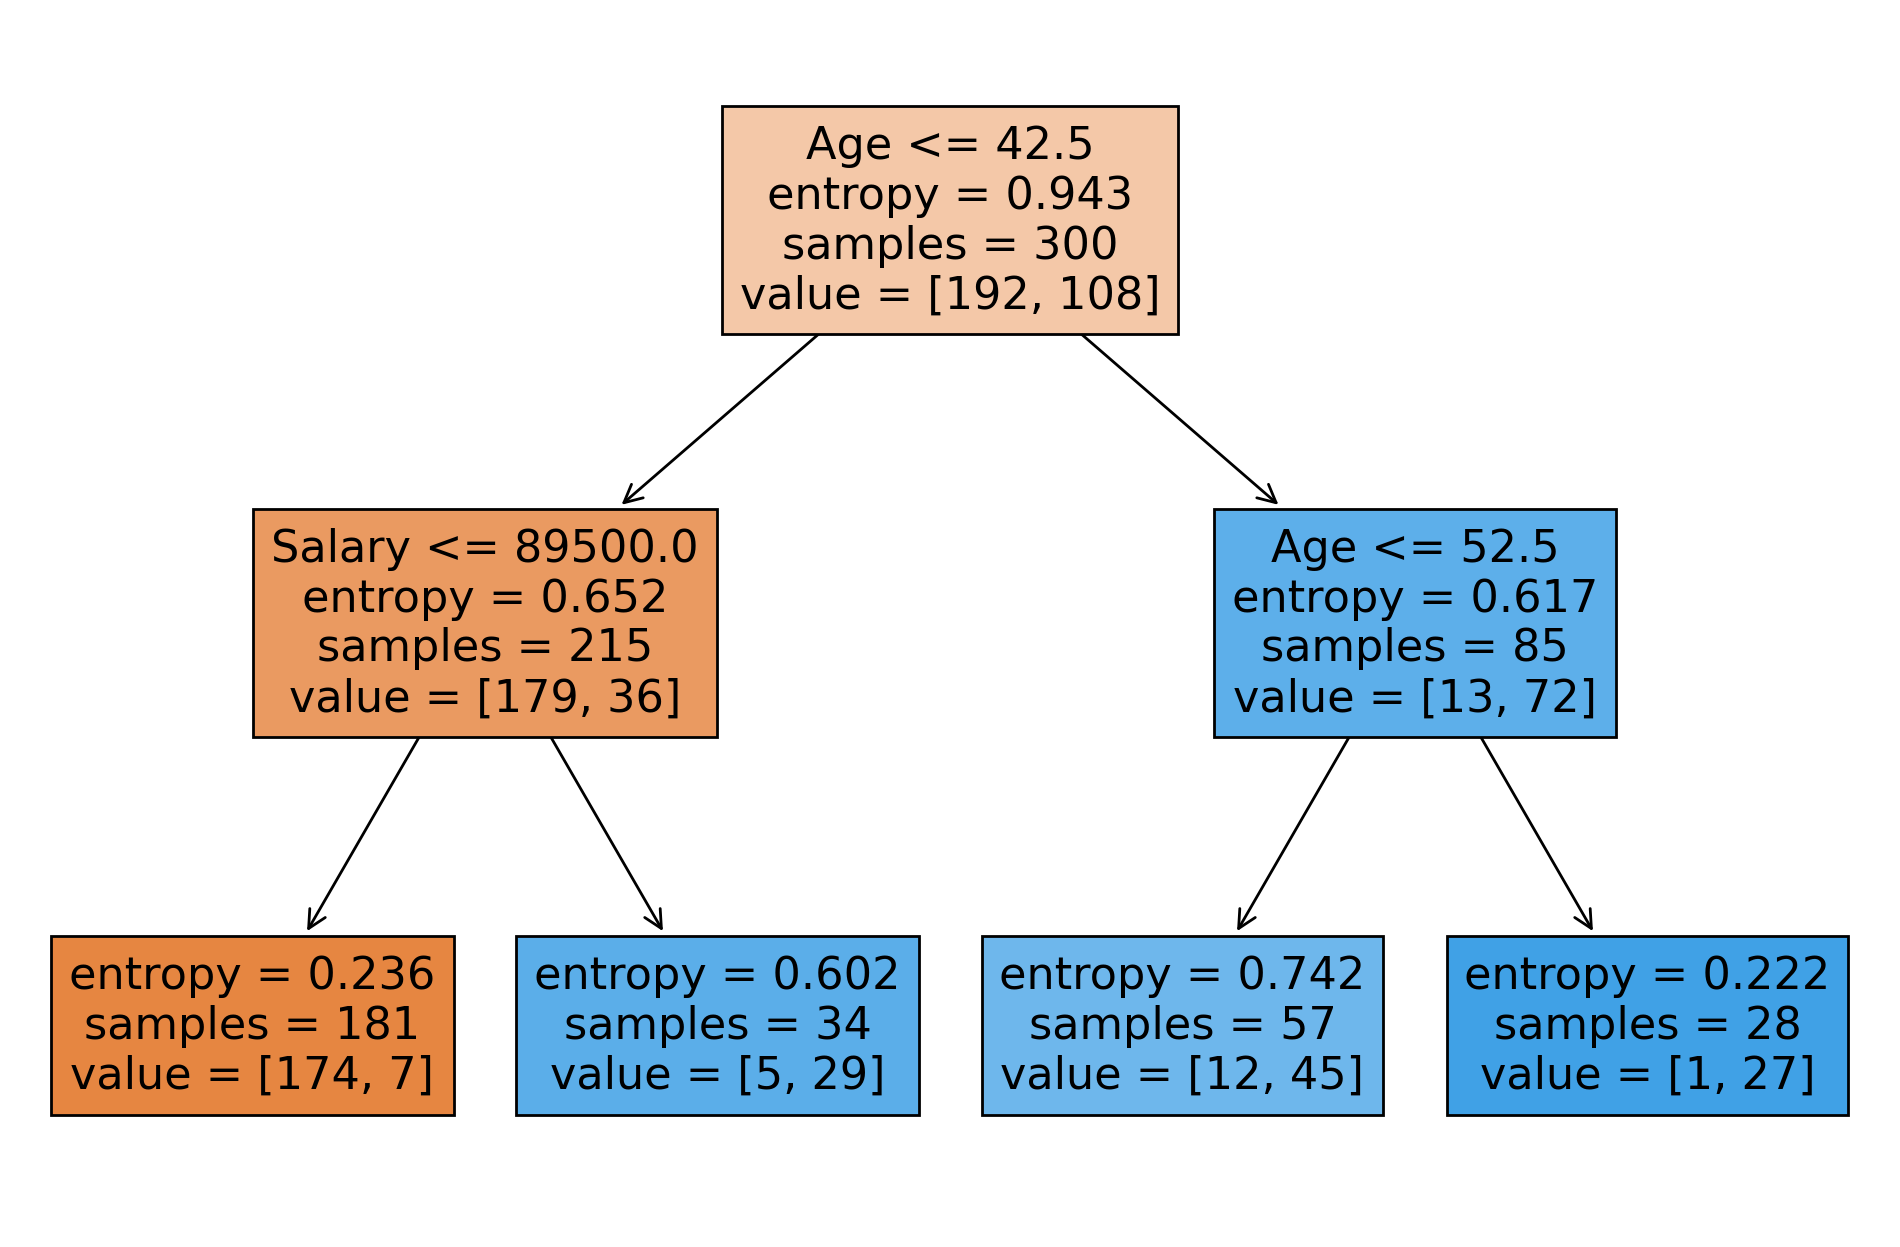

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=200)
plot_tree(classifier,feature_names=['Age','Salary'],filled=True)